In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mikoajfish99/marine-animal-images")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: harsha16112003
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mikoajfish99/marine-animal-images


100%|██████████| 227M/227M [00:02<00:00, 117MB/s]


In [3]:
# importing all the dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import pickle
import cv2
import random
import os


In [6]:
import sklearn

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Getting the data into the environment

In [9]:
Directory = "/content/marine-animal-images/images/train"
categories = [
"Fish",
"Goldfish",
"Harbor seal",
"Jellyfish",
"Lobster",
"Oyster",
"Sea turtle",
"Squid",
"Starfish"]

Fish 0
Goldfish 1
Harbor seal 2
Jellyfish 3
Lobster 4
Oyster 5
Sea turtle 6
Squid 7
Starfish 8


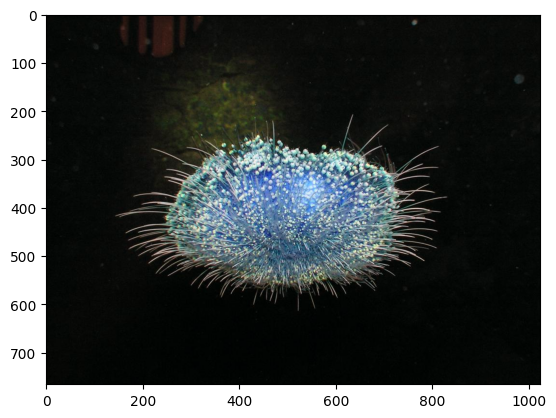

In [10]:
Image_size = 255
Data = []

for category in categories:
  folders = os.path.join(Directory,category)
  label = categories.index(category)
  print(f"{category}",label)
  for img in os.listdir(folders):
    img_path = os.path.join(folders,img)
    img_arr = cv2.imread(img_path)
    img_resize =cv2.resize(img_arr,(Image_size,Image_size))
    plt.imshow(img_arr)
    #break
    Data.append([img_resize,label])

In [11]:
len(Data)

621

In [12]:
random.shuffle(Data)

In [13]:
Data[0]

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 8]

In [14]:
x = []
y=[]

for features,label in Data:
  x.append(features)
  y.append(label)

In [15]:
len(x)

621

In [16]:
len(y)

621

In [17]:
x = np.array(x)
y = np.array(y)

In [18]:
x.shape

(621, 255, 255, 3)

In [19]:
x

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [20]:
# Importing the necessary libraries

In [21]:
import tensorflow


In [22]:
from keras.layers import Conv2D,MaxPooling2D,Dense

In [23]:
from keras.layers import Normalization,Flatten
from keras.models import Sequential

In [24]:
# Building the Model

In [25]:
cn = Sequential()
cn.add(Conv2D(64,(3,3),padding="same",activation="relu",input_shape=(255, 255, 3)))
cn.add(MaxPooling2D((2,2)))
cn.add(Conv2D(32,(3,3),padding="same",activation="relu"))
cn.add(Normalization())
cn.add(MaxPooling2D((2,2)))
cn.add(Conv2D(64,(2,2),padding="same",activation="relu"))
cn.add(Normalization())
cn.add(MaxPooling2D((1,1)))
# Dense Layer
cn.add(Flatten())
cn.add(Dense(400,activation="relu"))
cn.add(Dense(250,activation="relu"))
cn.add(Normalization())
cn.add(Dense(150,activation="relu"))
cn.add(Dense(9,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
cn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 255, 255, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 127, 127, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization (Normalization)        │ (None, 127, 127, 32)        │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization_1 (Normalization)      │ (None, 63, 63, 64)          │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 254016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 400)                 │     101,606,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 250)                 │         100,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization_2 (Normalization)      │ (None, 250)                 │             501 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 150)                 │          37,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,359 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,775,266 (388.24 MB)

 Trainable params: 101,774,571 (388.24 MB)

 Non-trainable params: 695 (2.73 KB)

In [27]:
cn.compile(optimizer="adam",
           loss="sparse_categorical_crossentropy",
           metrics=["accuracy"])

In [28]:
history = cn.fit(x,y,epochs=10,validation_split=0.1)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 544ms/step - accuracy: 0.1417 - loss: 410.8225 - val_accuracy: 0.1746 - val_loss: 11.1188
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.2159 - loss: 7.3789 - val_accuracy: 0.2857 - val_loss: 2.0923
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.3823 - loss: 1.8476 - val_accuracy: 0.2222 - val_loss: 1.9852
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.6380 - loss: 1.2408 - val_accuracy: 0.3175 - val_loss: 2.0474
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.8557 - loss: 0.6627 - val_accuracy: 0.2222 - val_loss: 2.4069
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9285 - loss: 0.3875 - val_accuracy: 0.2857 - val_loss: 2.9205
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9703 - loss: 0.2334 - val_accuracy: 0.2857 - val_loss: 2.8244
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9873 - loss: 0.1256 - val_accuracy: 0.174

In [29]:
# visualizing the data

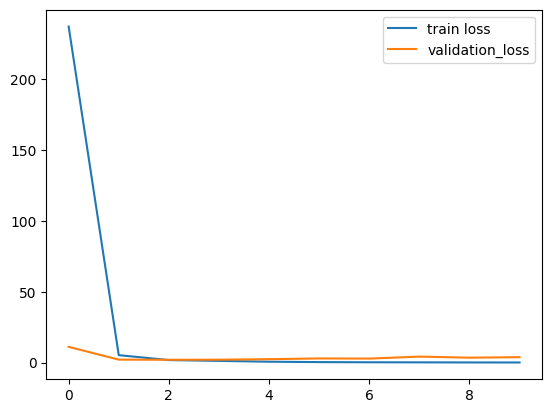

In [30]:
plt.plot(history.history["loss"],label="train loss")
plt.plot(history.history["val_loss"],label="validation_loss")
plt.legend()
plt.show()

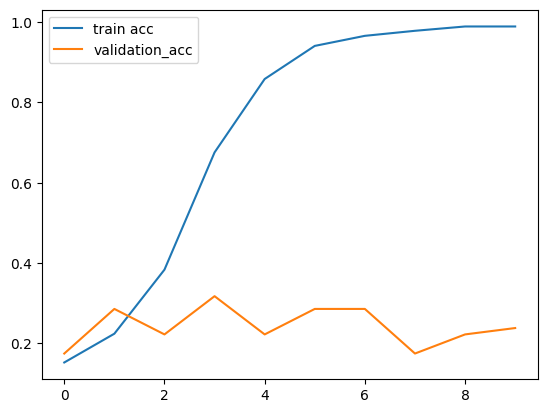

In [31]:
plt.plot(history.history["accuracy"],label="train acc")
plt.plot(history.history["val_accuracy"],label="validation_acc")
plt.legend()
plt.show()

In [32]:
#Building the Predictive Model

In [33]:
img = cv2.imread("/content/marine-animal-images/images/test/Sea turtle/2550e69ef474a1d9.jpg")
img = cv2.resize(img,(255,255))
img_arr = np.array(img)
img_arr = img_arr.reshape((1,255,255,3))

In [34]:
from tensorflow.keras.preprocessing import image

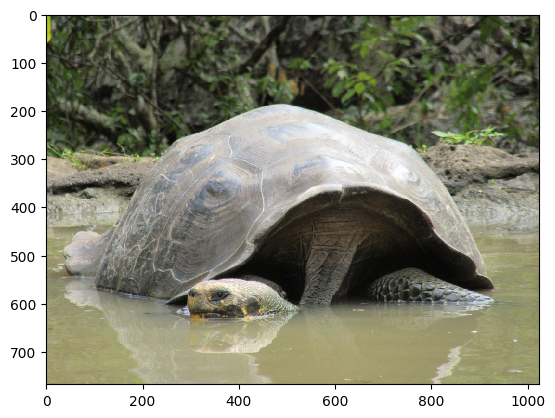

In [35]:
img = image.load_img("/content/marine-animal-images/images/test/Sea turtle/2550e69ef474a1d9.jpg")
plt.imshow(img,interpolation='nearest')
plt.show()

In [36]:
a = cn.predict(img_arr)
indeces = np.argmax(a)
if indeces == 0:
  print("Fish")
elif indeces == 1:
  print("Goldfish")
elif indeces == 2:
  print("Harbor seal")
elif indeces == 3:
  print("Jellyfish")
elif indeces == 4:
  print("Lobster")
elif indeces == 5:
  print("Oyster")
elif indeces == 6:
  print("Sea turtle")
elif indeces == 7:
  print("Squid ")
else:
  print("Starfish")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Sea turtle
